In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import gensim
import spacy
#import pyspark
#from pyspark import *
import textprocessing
import re
from textprocessing import preprocessing
from nltk.sentiment.vader import SentimentIntensityAnalyzer as Vader
from textprocessing import textfeatures
import psycopg2
from os import path
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image



In [65]:
d = path.dirname('/Users/uun466/Desktop/Data-Science-Project/')

In [41]:
#!/usr/bin/python
import sys, os
from PIL import Image
from PIL import ImageFilter
 
inputFile = "test-output-black"
outputFile = os.path.splitext(inputFile)[0] + ".png"
im = Image.open(path.join(d, "thumbs-up-mask.png"))
im = im.filter(ImageFilter.BLUR)
mask = Image.new((im.mode), (im.size))
out = Image.blend(im, mask, 0.3)
out.save(outputFile)

In [87]:
thumbs_mask_blk = np.array(Image.open(path.join(d, "thumbs-up-hand.jpg")))

In [88]:
thumbs_mask_blk.ndim

3

In [52]:
conn = psycopg2.connect(database="tweetdata", user="postgres", password="pass", host="localhost", port="5432")
dbcur = conn.cursor()
movie_nm = 'Moana'
querystr = dbcur.mogrify("SELECT word, count FROM tweet_words WHERE movie = '%s';" % movie_nm)
print querystr
dbcur.execute(querystr)
freq_dict = []
for record in dbcur:
    freq_dict.append(record)
    
print freq_dict
    

SELECT word, count FROM tweet_words WHERE movie = 'Moana';
[('whats', 5), ('active', 1), ('participant', 1), ('think', 4), ('know', 5), ('magical', 17), ('everyone', 4), ('million', 11), ('abducted', 3), ('early', 1), ('airbus', 1), ('special', 1), ('voyager', 1), ('made', 2), ('could', 2), ('create', 1), ('kakamora', 1), ('disneyinspired', 1), ('bento', 1), ('tutorial', 1), ('unconditionally', 1), ('crazy', 1), ('cast', 5), ('finding', 36), ('learn', 2), ('there', 48), ('stuck', 2), ('preview', 2), ('polynesian', 3), ('happen', 3), ('head', 3), ('whoa', 36), ('read', 4), ('asked', 3), ('loved', 15), ('voice', 40), ('youre', 12), ('footage', 36), ('premiere', 6), ('thing', 4), ('masterpiece', 4), ('world', 5), ('last', 4), ('take', 38), ('gave', 4), ('meant', 4), ('final', 2), ('parent', 3), ('fresh', 7), ('review', 33), ('themed', 2), ('video', 3), ('make', 13), ('today', 15), ('story', 5), ('weekend', 89), ('forever', 5), ('part', 3), ('saying', 3), ('turn', 3), ('join', 3), ('office

In [71]:
wc = WordCloud(background_color="white",max_words=1000, mask=thumbs_mask_blk, margin=40,max_font_size=400, 
               relative_scaling= 0.5,random_state=1).generate_from_frequencies(freq_dict)

In [74]:
wc.words_

[('weekend', 1.0),
 ('office', 0.5842696629213483),
 ('there', 0.5393258426966292),
 ('voice', 0.449438202247191),
 ('take', 0.42696629213483145),
 ('seeing', 0.42696629213483145),
 ('pace', 0.42696629213483145),
 ('almost', 0.42696629213483145),
 ('finding', 0.4044943820224719),
 ('whoa', 0.4044943820224719),
 ('footage', 0.4044943820224719),
 ('review', 0.3707865168539326),
 ('might', 0.3707865168539326),
 ('theatre', 0.3146067415730337),
 ('finest', 0.2808988764044944),
 ('contemporary', 0.2808988764044944),
 ('thrs', 0.2808988764044944),
 ('love', 0.2696629213483146),
 ('cant', 0.23595505617977527),
 ('rock', 0.20224719101123595),
 ('magical', 0.19101123595505617),
 ('great', 0.19101123595505617),
 ('heihei', 0.1797752808988764),
 ('carpet', 0.1797752808988764),
 ('experience', 0.1797752808988764),
 ('much', 0.1797752808988764),
 ('loved', 0.16853932584269662),
 ('today', 0.16853932584269662),
 ('wait', 0.16853932584269662),
 ('would', 0.16853932584269662),
 ('soundtrack', 0.157303

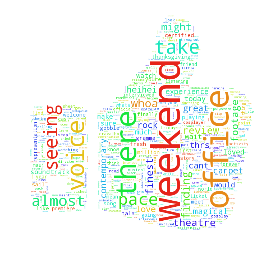

In [93]:
%matplotlib inline
wc = WordCloud(background_color="white", max_words=2000, mask=thumbs_mask_blk)
# generate word cloud
wc.fit_words(freq_dict)

# store to file
wc.to_file(path.join(d, "new.png"))

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
#plt.imshow(thumbs_mask_blk, cmap=plt.cm.gray)
#plt.axis("off")
plt.show()